Mark Henry

January 2019

# Using Microsoft Cognitive Services for Performing Arabic OCR on public scanned images of an Arabic Magazine called: 

مجلة الإذاعة والتليفزيون 

This is the cover page of its current issue: 

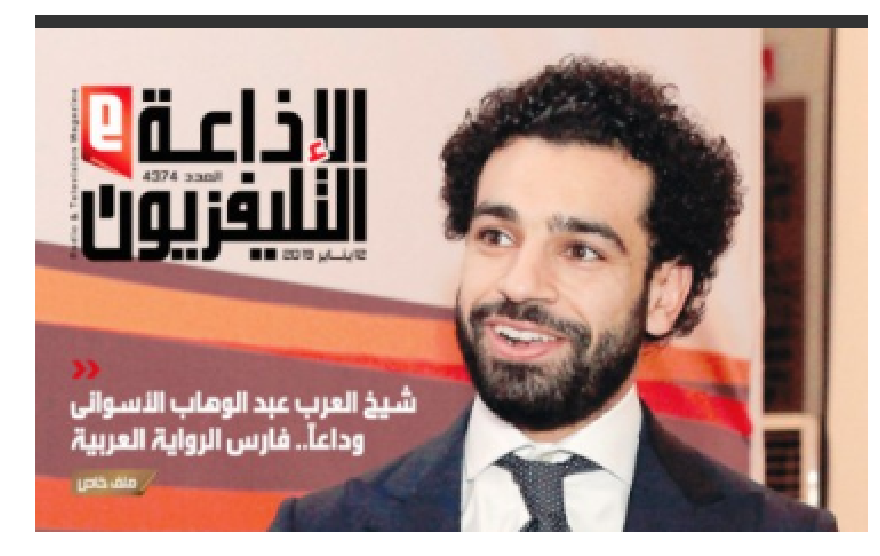

In [2]:
image_url = ""

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests

plt.figure(figsize=(15,15))
image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, shape=(120,120))
_ = plt.axis("off")

Their historical archive is on their website: https://www.maspero.eg/wps/portal/home/radio-and-tv-magazine/archive/history-archive/

The task here is to try to take a single page and use Microsoft's cognitive services to OCR from the images to text.  

I have left the results of my work, but for replication, you need to set the 2 variables below.  Use this reference if you don't know where to start: https://azure.microsoft.com/en-us/services/cognitive-services/computer-vision/

I have uploaded all the images to a blob storage container for easy access in code.  Also replace with your container to run the code.  

In [3]:
subscription_key = ''
vision_base_url = "https://westeurope.api.cognitive.microsoft.com/vision/v2.0/"

## Initial Setup

### Key Assertions

In [4]:
assert subscription_key
assert vision_base_url

### Setting up the URLs

In [5]:
ocr_url = vision_base_url + "ocr"
attempt1_image = ""
attempt2_image = ""
attempt3_image = ""

### Other parameters needed by Microsoft's Cognitive Services

In [6]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'language': 'ar', 'detectOrientation ': 'true'}

## Attempt # 1: Whole Page

This is the first page of the 15 Feb 1958 edition

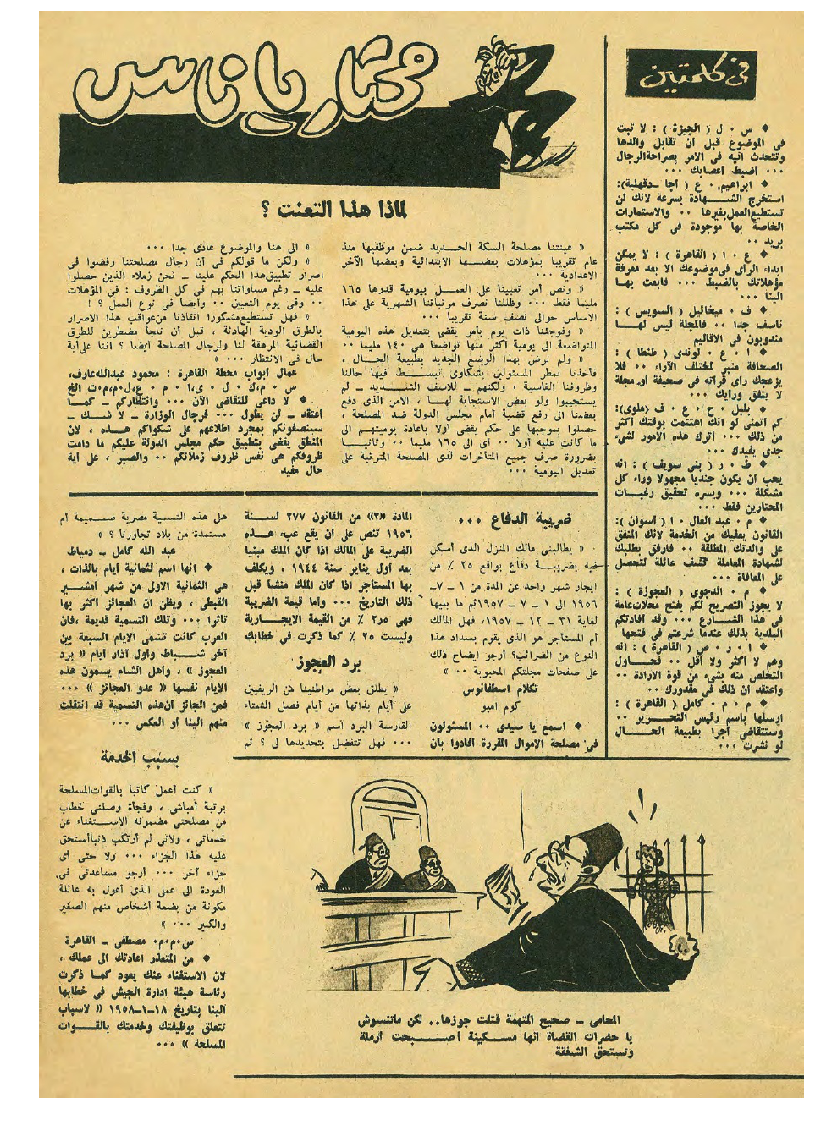

In [7]:
plt.figure(figsize=(15,20))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt1_image).content))
ax     = plt.imshow(image, shape=(120,120))
_ = plt.axis("off")

Blindly try the Arabic OCR service on the whole page: 

In [8]:
data     = {'url': attempt1_image}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
# word_infos

full_text = ''

for item in word_infos: 
    full_text = full_text + ' ' + item['text']
    
print('Article: \n{}'.format(full_text))

Article: 
 ؟ التعنت هذا اذا ، دا عادى والموشوع هنا الى « مي رفضوا مصلحتنا دجال أن في قولكد ما «ولكن صلو الذين زملا» تسن - عليثا الك تطبيقهدا اصرار الهلات فى ؛ الظروف ل فى بهب مساواكا وه عليه ؟ العل نوع في وأيفا ٠٠ التعين يوم وفي الاسرار هذا منعواقب القاذثا تستطيعثمورا فهل للطرق مضطرين ناجأ أن قبل ، الهادثة الودية بالطرق عيإية انثا ؟ أيضا الملحة ولرجال لنا ارهقة الففاية عبدالهعارف، محمود ؛ القاهرة محلة ابوا عمال ، ا ل مالا » م الخ ع،لم،مت • م ٠٠٠ الآن للتقافى داعي لا عما - وانظارعم ب شك لا - الوزارة فرجال ٠٠٠ يطول لن - اعتقد لان ، هسله شكواه عل اطلاعهم بهجرد سيتعفوئكم واعت ما علي الدولة مجلس حك تطيق يقفى الطق إية عل » والعبر ٠• زملائ ظروف لضي عى ظروف مفيد حال متذ موظفيها شمئ الحدي الة مصلحة «عيدعنا الأخر وبعضها الامداثية بعضها بمؤعلات تقريبا عام الاعدادية ١٦٥ قدرها بيومية العمل عل تستا أمر ونه أ هذا عل الشهرية مرتياتنأ نمرف ومللئثا ٠٠٠ فقط مليما ، تقرببا سئة تهف حوالى الاساس اليومية هذه يتمديل يقفي بأمر يوم ؤات وفوثتأ ٠٠ مليما ١٤٠ هي تواضعا ملها آثر يومية ال المعواط«مة ، الحال يطبيسة ال

Makes no sense.  Lets try to understand, by superimposing the text on the images.  

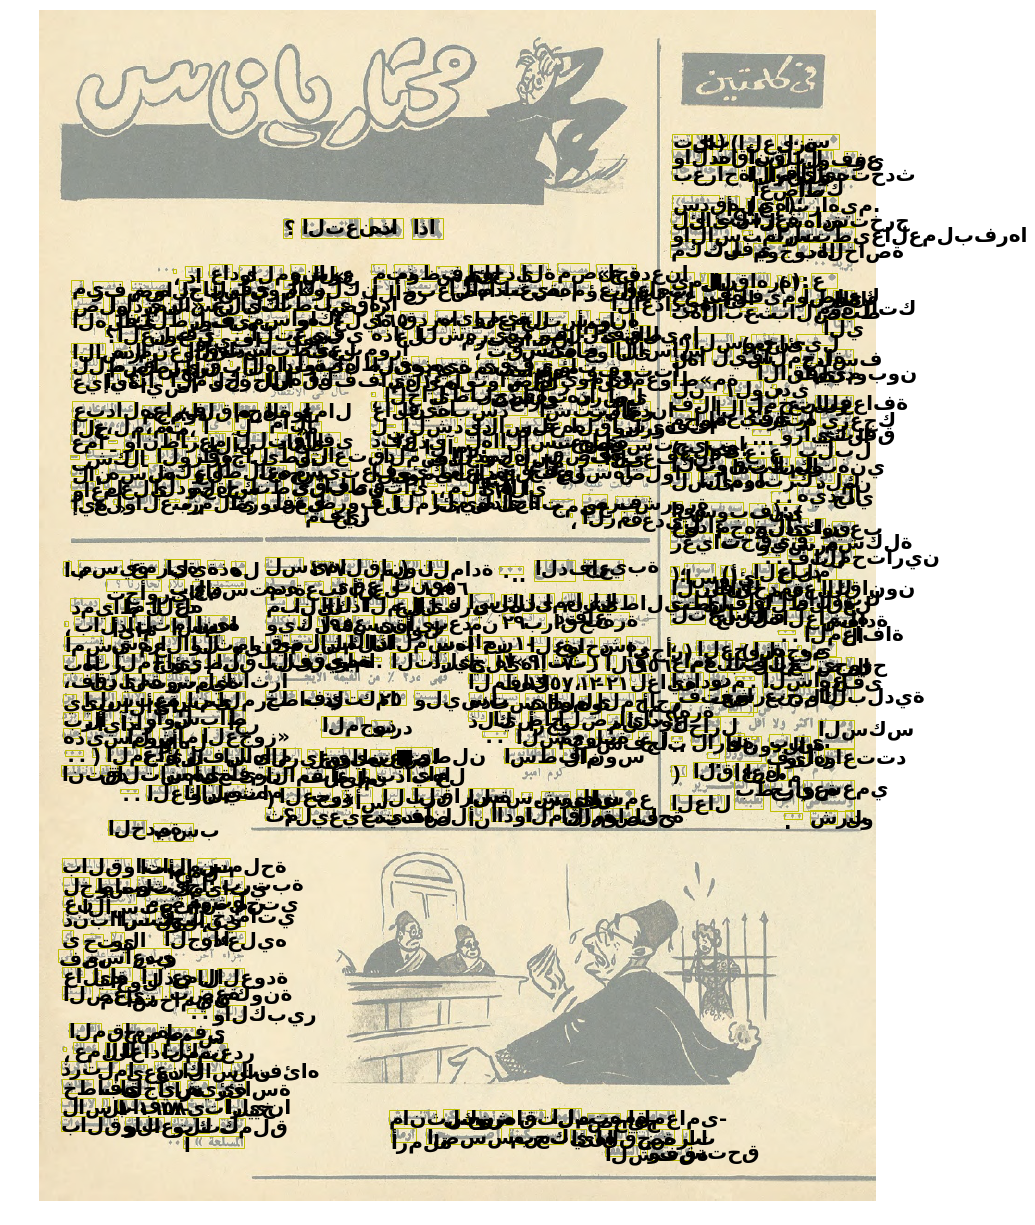

In [9]:
plt.figure(figsize=(15,35))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt1_image).content))
ax     = plt.imshow(image, alpha=0.5, shape=(120,120))
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = mpl.patches.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=1, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

Verdict: Predicts pretty well, but some challenges with the language.  

## Attempt #2: Page 1 - Article 1

I manually cropped this, then uploaded the cropped image.  Lets have a look at it first: 

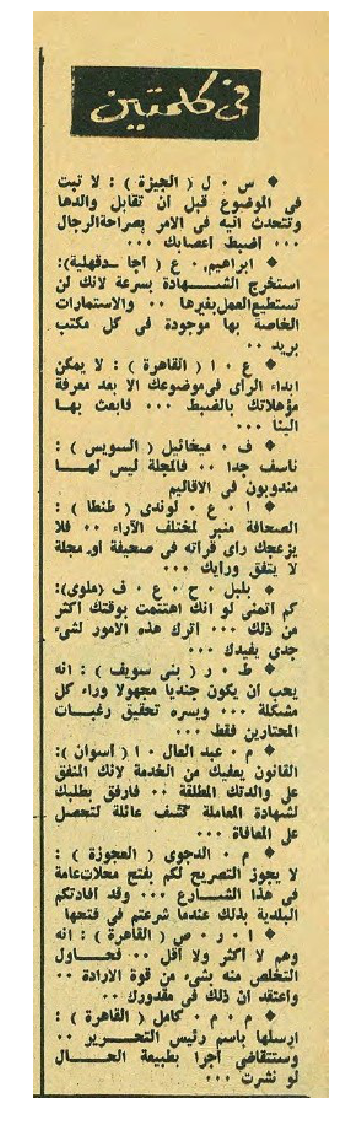

In [10]:
plt.figure(figsize=(15,20))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt2_image).content))
ax     = plt.imshow(image, shape=(120,120))
_ = plt.axis("off")

In [11]:
data     = {'url': attempt2_image}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
# word_infos

full_text = ''

for item in word_infos: 
    full_text = full_text + ' ' + item['text']
    
print('Article: \n{}'.format(full_text))

Article: 
 تزكاءمون تيت لا : ) (العيزة ل ٠ س والدها تقابل أن قبل الوفوع فى بعراحةالرجال الامر في اليه وتتحدث اعصابك اهبط سدقهلية)؛ أجا ( ع ، ابراهيم. لن لائك بسرعة الشهادة استخرج والاستمارات ٠٠ تستطيعالعملبفرها مكتب كل في موجودة بها الخاصة يملن لا القاهرة): ( ١ ٠ ع ععرفة بمد الا فىموضوعك الراى اناء بها لابعث ٠٠٠ بالضبط مؤهلاتك الي ؛ ) السويس ( ميخائيل ٠ لها ليس فالمجلة ، جدا اسف الاقاليم في مندوبون ولن لود • فلا ٠٠ الآراء لمختلف عنبر المعافة مجلة او معيفة في راته را يزعجك ... ورإيك يتفق لا (علوى؛ ف ع ع بلبل اكثر بوقتك اهتتمت انك لو اتمني لشىء الامور هده الولا ٠٠٠ ذلك فن ٠٠ هيدلا جدي ايه : ) سوبه بنى د( عل وداء مجهولا جنديا يكون ان يعب رغبات تحقيق ويسره ٠٠ مشكلة ٠٠ فتل المعتارين )؛ اسوأئ ( ١٠ العال عبد ٠ م النفق لانك الخدمة من يعلك القانون نطلك ارفق ٠٠ المطلقة والدتك عل لتعل عاللة كف العاملة شهادة ٠٠٠ المعافاة ى ؛ ) العحوزة ( الدجوي • م عامة معلات بفتح لكم التصريح يعوز لا انادتكم وفد ٠٠٠ الشارع هذا فى فتحها فى شربج عندما دلك البلدية (عرةه كحارل .. الارادة قوة . بني. نه انتكس .. كنودلا ف

Superimpose on the image

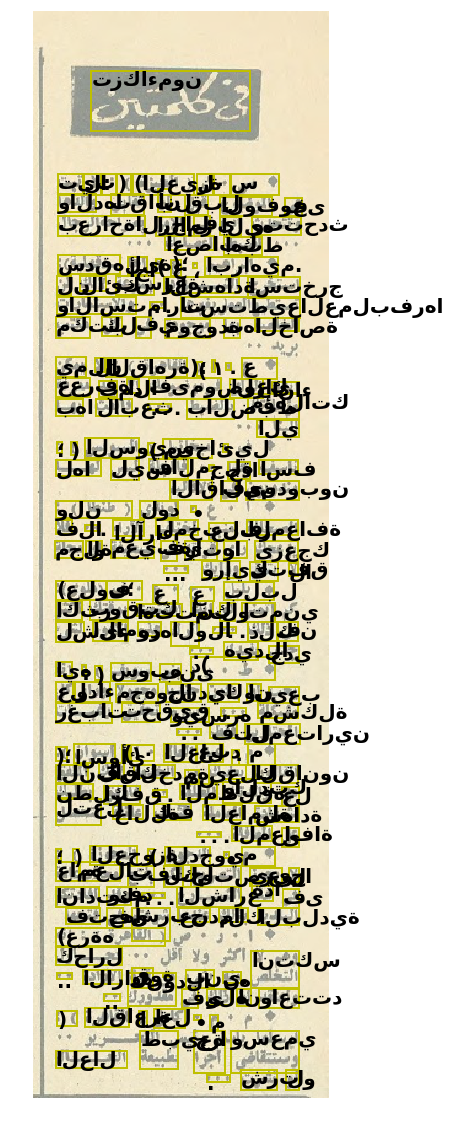

In [12]:
plt.figure(figsize=(15,20))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt2_image).content))
ax     = plt.imshow(image, alpha=0.5, shape=(120,120))
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = mpl.patches.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

Verdict: 
* Seems that the text discovered is somewhat correct, the display on the image above might be the issue.  
* Seems that we started with a large article, I'll try a smaller one.  
* Still unclear what the problem is, drill deeper with next section

## Attempt #3: Page 1 - Article 3 - Excerpt 1

From the same 15 Feb 1958 issue.  I have only taken a single column to simplify and attempt to reach a better result.    

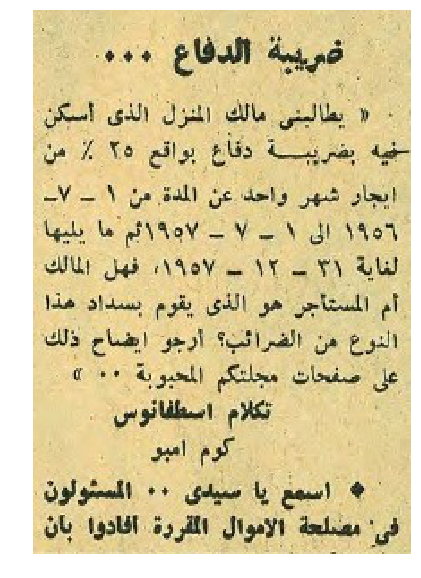

In [13]:
plt.figure(figsize=(15,10))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt3_image).content))
ax     = plt.imshow(image, shape=(120,120))
_ = plt.axis("off")

Extract the whole article

In [14]:
data     = {'url': attempt3_image}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
# word_infos

full_text = ''

for item in word_infos: 
    full_text = full_text + ' ' + item['text']
    
print('Article: \n{}'.format(full_text))

Article: 
 ٠٠. الدفاع ذريية اسكن الذى المنزل مالك «يطاليتى من ٢٩ براقح دفاع بهرة ا من١- الدة عن واحد شهر ايجأر يليها ما ٧و٩إثر - ٧ ١- الى ١٩٥٦ المالك فهل ١٩٥٧، - ١٢ - ٢١ لغاية هذا بسداد يقوم اللى هو المحاجر أم ذلك ايضاح أرجو الضرائب؟ من اوغ ٠٠ السيوبة مجلت سفحأت عل اسطفانوس لام م المسشولون ٠٠ سيدى يا اسمع بأن اكادوا المقررة الاموال مصلحة فى


Some words make sense, others have small mistakes.  To a certain extent, some work is done, but it is unclear what percentage needs revisiting by a human.  

Suggestion: 
* Use a team of QA experts to fix the small typo's.  
* Try to using an NLP engine equivalent to LUIS to solve this issue.  
* Issue: each line is reversed, it reads LTR instead of RTL

Lets check by superimposing:

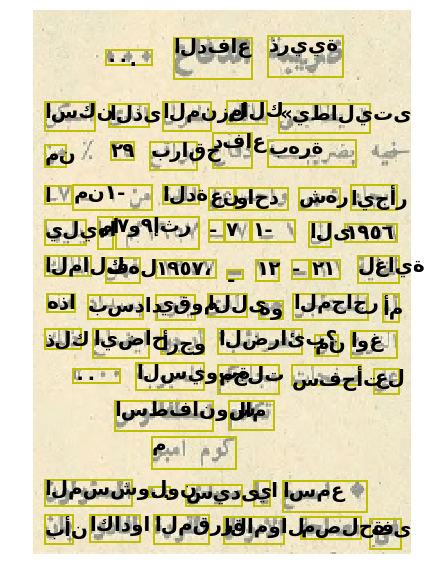

In [15]:
plt.figure(figsize=(15,10))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt3_image).content))
ax     = plt.imshow(image, alpha=0.5, shape=(120,120))
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = mpl.patches.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

The issue with left to right should be simple enough.  Logically we need to do 2 things: 
* Automatically detect how many lines there are
* For each line, reverse the order of the words (switching from LTR to RTL)
* Combine the lines to get back to the original article OCRed in Arabic and hopefully makes sense.  

The following pieces of code do just that: 

In [16]:
# Use the vertical location of the bounding boxes returned by the cognitive services to make a decision.  

list_of_line_numbers = []
for item in word_infos:
    list_of_line_numbers.append(item['boundingBox'].split(',')[1])
list_of_line_numbers[0:5] #13 lines

['22', '15', '14', '51', '52']

It is clear that there is abount 30 pixels in the vertical position between each line and the next.  Here, I will use a simple threshold of +/- 8 pixels, relative to the current vertical position, to determine if the next word is on the same line in the image or on the next line: 

In [17]:
import numpy as np
lines = np.zeros((len(list_of_line_numbers), len(list_of_line_numbers)))
x, y, line_number = 0,0,0
lines[x][y] = line_number
line_number = 1

for a in np.arange(0, len(list_of_line_numbers)-1):
    diff =  int(list_of_line_numbers[line_number]) - int(list_of_line_numbers[line_number-1])
#     print(diff)
    
    if (diff <= 8 ) and (diff >= -8):
        # same line
        y+=1 # new word in same line
        lines[x][y] = line_number
        line_number += 1
    else: 
        # new line
        x+=1
        y=0
        lines[x][y] = line_number
        line_number += 1
        
lines = lines[~np.all(lines == 0, axis=1)]
lines = lines.T
lines = lines[~np.all(lines == 0, axis=1)]
lines = lines.T

print('Location of words on lines represented in a 2d array: ')

print(lines.shape,'\n', lines)

Location of words on lines represented in a 2d array: 
(13, 8) 
 [[ 0.  1.  2.  0.  0.  0.  0.  0.]
 [ 3.  4.  5.  6.  7.  0.  0.  0.]
 [ 8.  9. 10. 11. 12.  0.  0.  0.]
 [13. 14. 15. 16. 17. 18. 19.  0.]
 [20. 21. 22. 23. 24. 25. 26. 27.]
 [28. 29. 30. 31. 32. 33. 34. 35.]
 [36. 37. 38. 39. 40. 41. 42.  0.]
 [43. 44. 45. 46. 47. 48.  0.  0.]
 [49. 50. 51. 52. 53.  0.  0.  0.]
 [54. 55.  0.  0.  0.  0.  0.  0.]
 [56.  0.  0.  0.  0.  0.  0.  0.]
 [57. 58. 59. 60. 61.  0.  0.  0.]
 [62. 63. 64. 65. 66. 67.  0.  0.]]


Going back to the article, we have 13 lines with a maximum of 8 words per line.  We're donig something right.  

In [18]:
lines[lines==0]=-1
lines[0][0] = 0
final_output_text = ''
counter = 0
for line_c in np.arange(lines.shape[0]): 
    new_line = lines[line_c].tolist()
    new_line = list(filter(lambda a: a != -1, new_line))
    new_line.sort(reverse=True)
    for item in new_line: 
#         print(type(item))
#         print(item)
        final_output_text = final_output_text + word_infos[int(item)]['text']+ ' '
    final_output_text = final_output_text + '\n'
print(final_output_text)

ذريية الدفاع ٠٠. 
«يطاليتى مالك المنزل الذى اسكن 
بهرة دفاع براقح ٢٩ من 
ايجأر شهر واحد عن الدة من١- ا 
١٩٥٦ الى ١- ٧ - ٧و٩إثر ما يليها 
لغاية ٢١ - ١٢ - ١٩٥٧، فهل المالك 
أم المحاجر هو اللى يقوم بسداد هذا 
اوغ من الضرائب؟ أرجو ايضاح ذلك 
عل سفحأت مجلت السيوبة ٠٠ 
لام اسطفانوس 
م 
اسمع يا سيدى ٠٠ المسشولون 
فى مصلحة الاموال المقررة اكادوا بأن 



Now that makes some sense.  Typos are clear.  As stated above, could be fixed by: 
* Human intervention
* Enhancements on the images (although, Microsoft's Cognitive Services might already be doing that, a check wouldn't hurt)
* Arabic NLP engine

Here is the original piece for checking

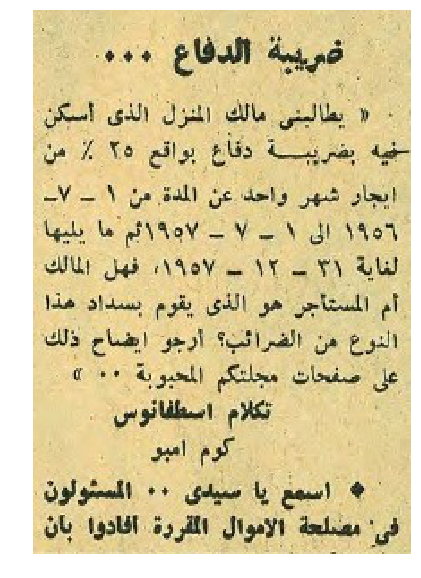

In [19]:
plt.figure(figsize=(15,10))

import matplotlib as mpl

image  = Image.open(BytesIO(requests.get(attempt3_image).content))
ax     = plt.imshow(image, shape=(120,120))
_ = plt.axis("off")